EDA on Haberman Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('haberman.csv')

In [3]:
df

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [4]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
df.tail()

,age,year,nodes,status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [6]:
df.shape

(306, 4)

In [7]:
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


Initial analysis of this dataset does not provide any clear information. So we looked it up at Kaggle and found what column names represent 

Age = Age of patient at time of operation (numerical)

Year = Patient's year of operation (year - 1900, numerical)

Nodes = Number of positive axillary nodes detected (numerical)

According to https://www.cancer.gov/publications/dictionaries/cancer-terms/def/positive-axillary-lymph-node?redirect=true
A lymph node in the area of the armpit (axilla) to which cancer has spread. This spread is determined by surgically              removing some of the lymph nodes and examining them under a microscope to see whether cancer cells are present.

Status = Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

In [9]:
df.columns = ['patient_age', 'year_of_op', 'pos_axil_nodes', 'surv_status_after_5yrs']
df

,patient_age,year_of_op,pos_axil_nodes,surv_status_after_5yrs
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


Changed the names of columns to make dataset more readable

In [10]:
df['surv_status_after_5yrs'] = df.surv_status_after_5yrs.map({1: 'Yes', 2: 'No'})

In [11]:
df.tail()

,patient_age,year_of_op,pos_axil_nodes,surv_status_after_5yrs
301,75,62,1,Yes
302,76,67,0,Yes
303,77,65,3,Yes
304,78,65,1,No
305,83,58,2,No


As survival status of patients after 5 years is one of the key indictors in this study, numerical representaion 1 has been changed to 'Yes' meaning the patient survived more then 5 years after operation. Also numerical representaion 2 has been changed to 'No' meaning the patient died within 5 years of operation.

In [12]:
df['surv_status_after_5yrs'].value_counts()

Yes    225
No      81
Name: surv_status_after_5yrs, dtype: int64

In [13]:
df.describe()

,patient_age,year_of_op,pos_axil_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


Data Analysis so far:

Dataset is quite small with only 305 entries.

Survival status data is imbalanced in favour of patients who survived 5 years after operation.

There are no Null or missing values.

More then 75% of the patients have less then or equal to 4 positive axillary nodes with 25% of the patients having none at all.





2D Scatter plot:

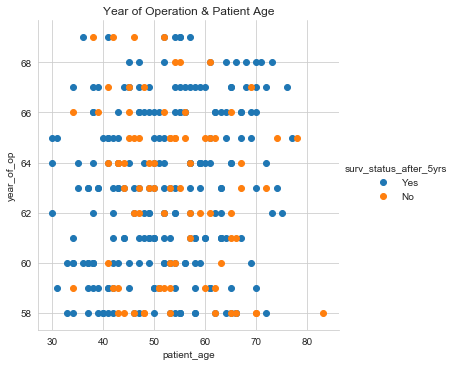

In [37]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="surv_status_after_5yrs", size=5) \
   .map(plt.scatter, "patient_age", "year_of_op") \
   .add_legend();
plt.title('Year of Operation & Patient Age');

plt.show();

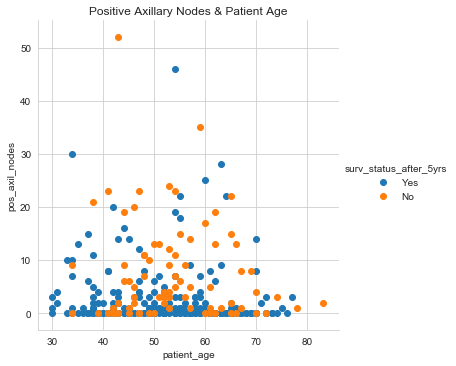

In [38]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="surv_status_after_5yrs", size=5) \
   .map(plt.scatter, "patient_age", "pos_axil_nodes") \
   .add_legend();
plt.title('Positive Axillary Nodes & Patient Age');

plt.show();

As number of features is less we can deploy pair plots.

Pair Plots:

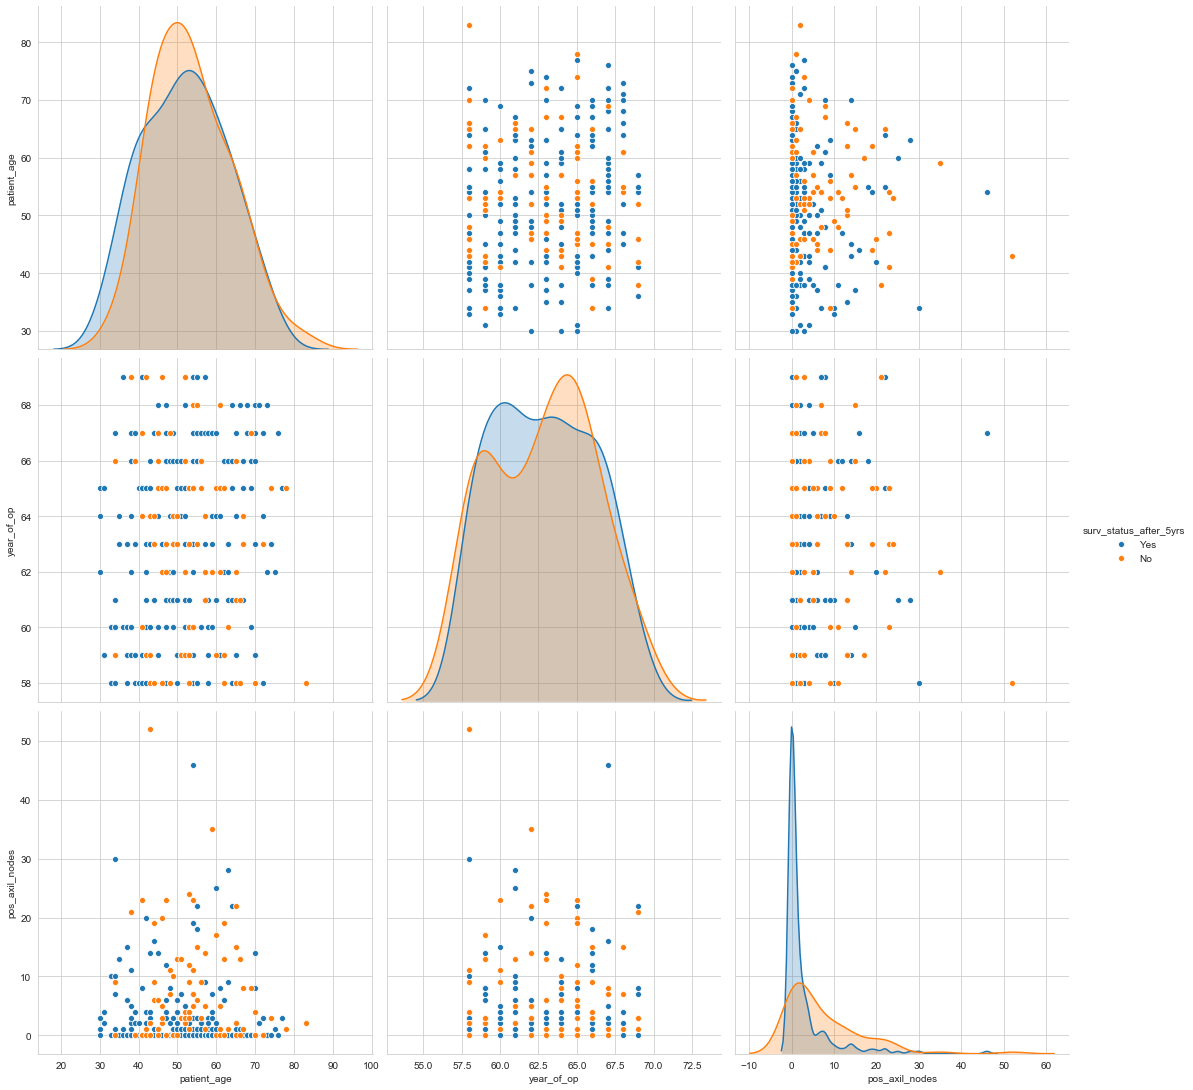

In [28]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="surv_status_after_5yrs", size=5);
plt.show()

Although the survival status seems to be mixed in all different combinations, the only feature that has bit of grouping is postive axillary nodes. Looking at the dataset it might be assumed that patients who had lower number of positive axillary nodes had a better chance of survival.

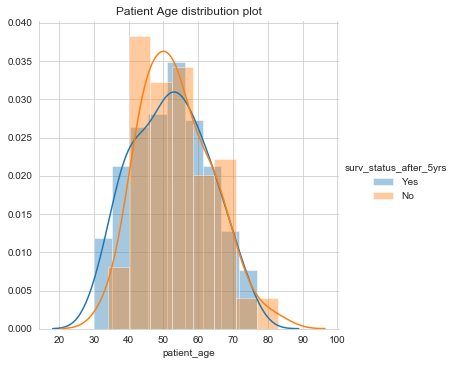

In [39]:
sns.FacetGrid(df, hue="surv_status_after_5yrs", size=5) \
   .map(sns.distplot, "patient_age") \
   .add_legend();
plt.title('Patient Age distribution plot');

plt.show();

Variable patient_age shows inconclusive results.

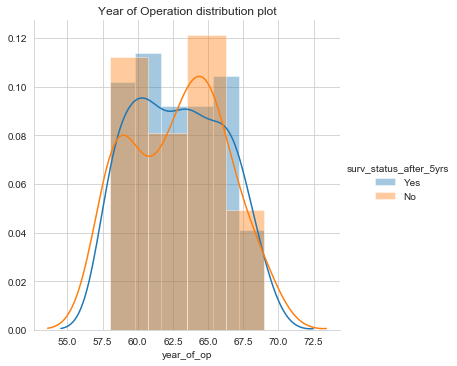

In [42]:
sns.FacetGrid(df, hue="surv_status_after_5yrs", size=5) \
   .map(sns.distplot, "year_of_op") \
   .add_legend();
plt.title('Year of Operation distribution plot');

plt.show();

Variable year_of_op also returns mixed data.

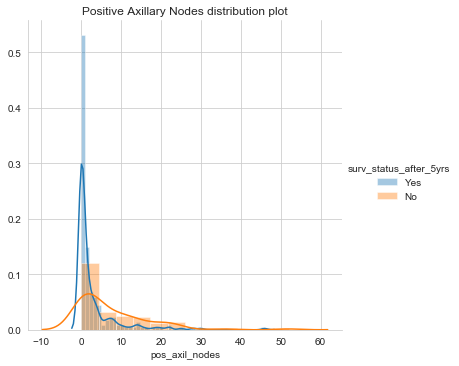

In [45]:
sns.FacetGrid(df, hue="surv_status_after_5yrs", size=5) \
   .map(sns.distplot, "pos_axil_nodes") \
   .add_legend();
plt.title('Positive Axillary Nodes distribution plot');

plt.show();

Variable pos_axil_nodes shows sharp peak of survivors for patients who have lower positive axillary nodes.

In [20]:
df_surv = df.loc[df['surv_status_after_5yrs']=='Yes']

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


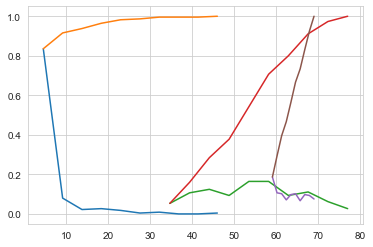

In [21]:
counts, bin_edges = np.histogram(df_surv['pos_axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



counts, bin_edges = np.histogram(df_surv['patient_age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)




counts, bin_edges = np.histogram(df_surv['year_of_op'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


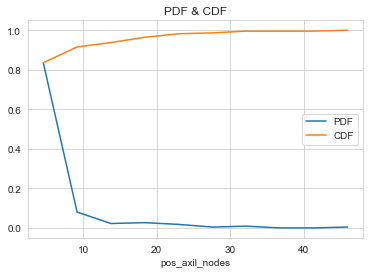

In [22]:
counts, bin_edges = np.histogram(df_surv['pos_axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
         
plt.xlabel('pos_axil_nodes')
plt.title('PDF & CDF')
plt.gca().legend(('PDF','CDF'));
plt.show();

PDF and CDF also confirm that patients who have lower poistive axillary nodes have a much better chance of survival.

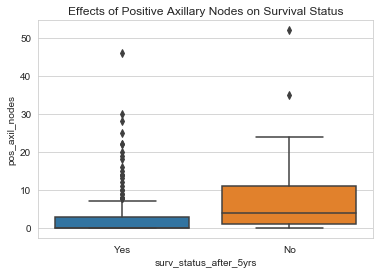

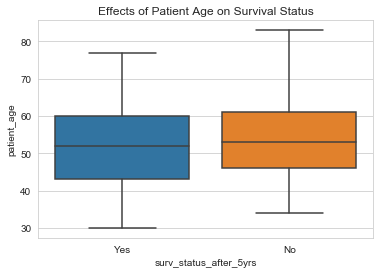

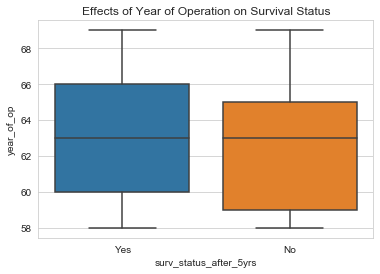

In [46]:
sns.boxplot(x='surv_status_after_5yrs',y='pos_axil_nodes', data=df)
plt.title('Effects of Positive Axillary Nodes on Survival Status');
plt.show()
sns.boxplot(x='surv_status_after_5yrs',y='patient_age', data=df)
plt.title('Effects of Patient Age on Survival Status');
plt.show()
sns.boxplot(x='surv_status_after_5yrs',y='year_of_op', data=df)
plt.title('Effects of Year of Operation on Survival Status');
plt.show()

Boxplots show that as the survivor rate drops significantly as number of positive axillary nodes increase more then 4.

Violin plot:

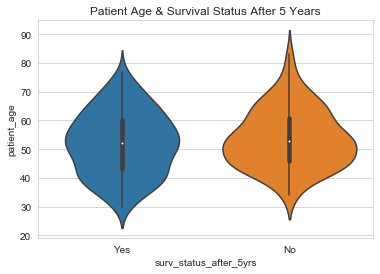

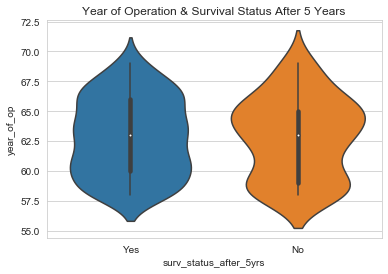

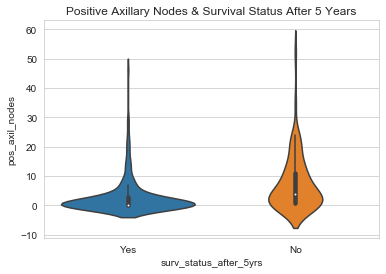

In [47]:
sns.violinplot(x="surv_status_after_5yrs", y="patient_age", data=df, size=3)
plt.title('Patient Age & Survival Status After 5 Years');
plt.show()
sns.violinplot(x="surv_status_after_5yrs", y="year_of_op", data=df, size=3)
plt.title('Year of Operation & Survival Status After 5 Years');
plt.show()
sns.violinplot(x="surv_status_after_5yrs", y="pos_axil_nodes", data=df, size=3)
plt.title('Positive Axillary Nodes & Survival Status After 5 Years');
plt.show()

Violin polt reconfirms the observation that patients who have positive axillary nodes below 4 have much greater chance of survival.

Conclusion:

Dataset is quite small with only 305 entries. It is not enough data to conclude any concrete results.

The main purpose of this study is to find variables which effect the chances of survival amongst breast cancer patients.

Although no clear distinction was found after plotting variables against each other, the only variable that kept propping up again and again through all different plot sets was the number of positive axillary nodes.

It has been found with some evidence that patients which had positive axillary nodes below 4 had around 80% more chances of survival then others.
    
    